Importing the necessary libraries for the tasks


Question. 1


In [0]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.tokenize import word_tokenize, TweetTokenizer
import matplotlib.pyplot as plt
import string

Loading the dataset and forming a raw text string


In [0]:
df = pd.read_csv('tweets-dataset.csv')

In [3]:
df.head()

,Sentence
0,"@BubblyDentist @MeetUunngLee nahi nahi, mere s..."
1,going to the grammys first entertainment law b...
2,bohot hi badiya ji aap sunao?
3,Parvez Musharraf is Digvijay Singh of Pakistan...
4,guddu ko bass john cena k sticker ki padii hai...


In [0]:
raw_text_string = ''
for i in df['Sentence']:
  raw_text_string  += i
raw_text_string = raw_text_string.lower()

Now let's pre-process the text and make it user friendly.
  The main task would include:
1. Removing the site links.
2. Removing all the string starting with @ and removing all the # tag words.
3. Removing all the punctuations


In [0]:
tweet_tokenize = TweetTokenizer(r'\w+', strip_handles = True)
raw_text_string = re.sub("http\S+"," ", raw_text_string)
raw_text_string = re.sub("pic.\S+(\xa0)*", "", raw_text_string)
raw_text_string = "".join([let for let in raw_text_string if let not in string.punctuation])
final_list = tweet_tokenize.tokenize(raw_text_string)
final_string = ' '.join(final_list)

In [0]:
num_tokens = len(final_list)
num_type_tokens = len(set(final_list))
TTR = num_type_tokens/num_tokens

In [7]:
print(f'The number of tokens in the text are {num_tokens}')
print(f'The number of unique tokens in the text are {num_type_tokens}')
print(f'The type by token ratio would be {TTR}')

The number of tokens in the text are 297744
The number of unique tokens in the text are 48912
The type by token ratio would be 0.16427535063678866


Question 3.
#Heap's Law

Let |V| be the size of the vocabulary and N be the corresponding number of tokens.

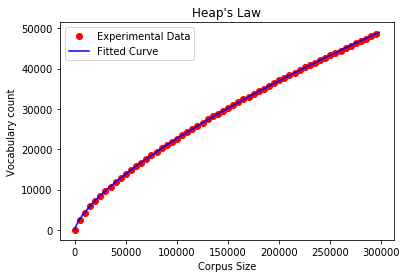

k = 6.636934197061343
beta = 0.7067278418906991


In [8]:
from scipy.optimize import curve_fit

numvocab = []
numtokens = []
vocabulary = set()
for i,token in enumerate(final_list):
    vocabulary.add(token)
    numvocab.append(len(vocabulary))
    numtokens.append(i+1)
   
Vnp = np.array(numvocab)
Nnp = np.array(numtokens)

def heap(x,k,b):
    return k*(pow(x,b))

parameters = curve_fit(heap,Nnp,Vnp)
k,b = parameters[0]

#plot of actual data and fitted curve
plt.plot(Nnp[::5000], Vnp[::5000], 'ro',label='Experimental Data')
plt.plot(Nnp,heap(Nnp,k,b),'-b',label = 'Fitted Curve')
plt.legend(loc='upper left')
plt.title('Heap\'s Law')
plt.xlabel('Corpus Size')
plt.ylabel('Vocabulary count')
plt.show()
print("k =",k)
print("beta =",b)